<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Assignment_01_Multiclass_Classification_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

**Assignment 1: Neural Networks for Analysis of Tabular Data**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)



# **READ CAREFULLY**

The **_first_**  digit in your myUTSA ID (e.g. "abc123") will determine which dataset you are to analyze for this assignment and which type of neural network (i.e. classification or regression) you will need to construct. For example, if your myUTSA ID was **vue682**, then your first digit is the number `6`.

**---WARNING------WARNING------WARNING------WARNING------WARNING------WARNING---**

You are **not** free to choose any dataset for this assignment. If analyze the wrong dataset, your assignment will **NOT BE GRADED** and you will automatically receive a **`0`**. If you are uncertain which dataset you should be working on, contact your Instructor for help. Remember, your score in this assignment will have a large impact on your course grade so please be careful.


| First Digit myUTSA ID    | Dataset to Analyze      | Neural Network Type
--------------------------|-------------------------|-----------------
0                         | Hepatitis               | Binary Classification
1                         | Coimbra Breast Cancer   | Binary Classification
2                         | Parkinson Speech        | Binary Classification
3                         | Indian Liver            | Binary Classification
4                         | Thyroid Replacement     | Multiclass Classification
5                         | Wine Quality            | Multiclass Classification
6                         | Liver Disease           | Multiclass Classification
7                         | Bone Marrow Transplant  | Regression
8                         | German Breast Cancer    | Regression
9                         | Diabetes Progression    | Regression

#### **NOTE: You can only use this COLAB notebook if the first digit of your _myUTSA_ ID  is between `0` and `3`.**

# **The Purpose of Assignments**

In this course, **_Assignments_** are designed to help me (and you) assess your ability to transfer knowledge gained in completing class coding exercises to solving more realistic problems.

Assignments play a pivotal role in reinforcing your learning, as they require you to apply theoretical concepts to practical scenarios. This helps solidify your understanding and enhances your problem-solving skills. By tackling these assignments independently, you develop critical thinking and the ability to synthesize information from various sources. Moreover, assignments encourage you to explore topics more deeply, fostering intellectual curiosity and promoting a deeper engagement with the subject matter. Ultimately, these assignments are not just a measure of your learning, but a means to equip you with the skills needed for real-world applications and future challenges.

## **MAKE A COPY OF THIS NOTBOOK!**

For your assignment to be graded, you **must** make a copy of this Colab notebook in your GDrive and use this copy as your worksheet.

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [1]:
# YOU MUST RUN THIS CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this assignment.")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
david.senseman@gmail.com


Your GMAIL address **must** appear in the output in order for your work to be graded. If your GMAIL is not visible you will receive a `0` for your grade. You will not be given a second chance to fix this problem!

# **Assigment 1: Multiclass Classification**

**Assignment_01** is specifically designed to assess your ability to write the Python/Tensorflow/Keras code necessary to build neural networks that can analyze tabular data stored in a Pandas DataFrame. These analyzes include: (1) binary classification, (2) multiclass classification and (3) regression.

You will use this Colab notebook **only** if the first digit in your myUTSA ID is between `4` and `6`. If that is correct, you have been assigned to perform **multiclass classification**.

Unlike your class lessons, you will **not** be given examples that you can use to simply copy-and-paste code. Rather, you will be given a problem to solve and it will be up to you to use code snippets that you have been given previously to solve different aspects of this assignment. And unlike your class lessons, your will **not** be given the correct output. In other words, this assignment is basically how you would solve an actual biomedical problem.

# **Multiclass Classification by Neural Networks**
**Multiclass classification** of tabular data is a type of supervised learning task where the goal is to categorize observations into one of three or more possible classes based on their attributes.

#### **Multiclass Classification:**
Multiclass classification deals with problems where there are multiple possible outcomes. Examples include:
1. **Disease Diagnosis:**
   - What type of diabetes does the patient have? (Type 1/Type 2/Gestational)
   - What stage is this breast tumor in? (Stage 0/Stage 1/Stage 2/Stage 3/Stage 4)
   - What type of hypertension does the patient have? (Primary/Secondary)
   - What variant of COVID-19 is the patient infected with? (Alpha/Beta/Delta/Omicron)
2. **Medical Outcomes:**
   - What is the prognosis for the patient after a heart attack? (Good/Fair/Poor)
   - What type of response will the patient have to a specific treatment? (Positive/Negative/Neutral)
   - What risk level does the patient have for developing heart disease? (Low/Medium/High)
3. **Medical Conditions and Symptoms:**
   - What type of depression is the patient experiencing? (Mild/Moderate/Severe)
   - What severity of sleep apnea does the patient have? (Mild/Moderate/Severe)
   - What is the patient's risk level for osteoporosis? (Low/Medium/High)
   - What genetic condition does the patient have a predisposition for? (Condition A/Condition B/Condition C)
4. **Medical Procedures:**
   - What type of surgery is recommended for this patient? (Surgery A/Surgery B/Surgery C)
   - What blood transfusion type does the patient need? (Type A/Type B/Type AB/Type O)
   - What category does the patient fall into for a particular clinical trial? (Group 1/Group 2/Group 3)

Here’s a step-by-step guide on how to perform multiclass classification using neural networks:
#### **Data Preparation:**
- **Collect Data:** Obtain a dataset with numerical features and a categorical target variable with multiple classes.
- **Clean Data:** Handle missing values, outliers, and erroneous entries.
- **Data Normalization:** Normalize your data (e.g. convert to Z-scores) to help the neural network learn more efficiently.
- **Data Pre-Processing:** Create X- and Y-feature vectors and encode the target variable into numerical format (e.g., one-hot encoding).
- **Split Data:** Divide your data into training and test sets.
#### **Neural Network Model**
- **Build the Neural Network Model:** Use TensorFlow and Keras to define the neural network architecture suitable for multiclass classification (e.g., using softmax activation in the output layer).
- **Train the Model:** Fit the model to your training data, using the validation set to monitor performance.
- **Evaluate the Model:** Assess the model’s performance on the test set using metrics like accuracy, precision, recall, F1-score, and Confusion Matrix:

## **Descriptions of Data Sets for Multiclass Classification**

This section describes the various datasets, information for downloading them, and what variable(s) your network should predict. Remember, you do **not** earn and credit if you analyze the wrong dataset. Pay particular attention to the **output** variable for Multiclass Classification because this column will contain the `Y- values` for your assigned dataset. You will need to know the name of the output feature when you are constructing yor `X-` and `Y-feature vectors`.

## **Thyroid Replacement Dataset - 1st myUTSA Digit = 4**

#### **Filename:** `thyroid_replacement.csv`
#### **Output Variable (Y values):** `class`


### **Thyroid Replacement Dataset**

The Thyroid Replacement dataset contains patient records and clinical features used to predict thyroid hormone replacement therapy. The dataset includes demographic information and various thyroid-related clinical test results.

#### Features:
1. **age**: Age of the patient.
2. **sex**: Gender of the patient (male/female).
3. **t_med**: Use of thyroxine (Yes/No).
5. **ant-med**: Use of antithyroid medication (Yes/No).
6. **sick**: Whether the patient is sick (Yes/No).
7. **pregnant**: Whether the patient is pregnant (Yes/No).
8. **t_surgery**: Whether the patient had thyroid surgery (Yes/No).
9. **I131_treat**: Whether the patient had radioactive iodine treatment (Yes/No).
12. **lithium**: Whether the patient is on lithium treatment (Yes/No).
13. **goiter**: Presence of goiter (Yes/No).
14. **turmor**: Presence of tumor (Yes/No).
15. **hypopituitary**: Whether the patient is hypopituitary (Yes/No).
16. **psych**: Whether the patient has psychiatric disorders (Yes/No).
17. **TSH**: Thyroid Stimulating Hormone level (mU/L).
18. **T3**: Triiodothyronine level (ng/dL).
19. **TT4**: Total Thyroxine level (μg/dL).
20. **FTI**: Free Thyroxine Index (unitless).
21. **TBG**: Free Thyroxine Index (unitless).


#### Output (Y variable):
- **class**: Indicates the thyroid hormone replacement therapy category (1: Class 1, 2: Class 2, 3: Class 3, 4: Class 4, 5: Class 5).


## **Wine Quality Dataset - 1st myUTSA Digit = 5**

#### **Filename:** `wine_quality.csv`
#### **Output Variable (Y values):** `quality`


### **Wine Quality Dataset**

The Wine Quality dataset contains physicochemical properties of wines, which are used to predict the quality of the wine. The dataset includes two sets of wines: red and white vinho verde wines from the north of Portugal. Each wine sample is described by 11 features and a quality score.

#### Features:
1. **color**: Wine color, red or white.
2. **fixed acidity**: Fixed acids that remain in the wine during fermentation (e.g., tartaric acid).
3. **volatile acidity**: Acetic acid content, which can give wine an undesirable vinegar flavor.
4. **citric acid**: Provides freshness to wines and can contribute to flavor.
5. **residual sugar**: The amount of sugar remaining after fermentation.
6. **chlorides**: The amount of salt in the wine.
7. **free sulfur dioxide**: SO₂ that is not bound to other molecules and is available to act as an antimicrobial agent.
8. **total sulfur dioxide**: The sum of free and bound forms of SO₂.
9. **density**: The density of the wine, closely related to alcohol and sugar content.
10. **pH**: Measures the acidity or alkalinity of wine.
11. **sulphates**: A wine preservative and antioxidant.
12. **alcohol**: Alcohol content of the wine.

#### Output (Y variable):
- **quality**: Quality score of the wine, likely on a scale from 0 to 10, based on sensory data from wine experts.

## **Liver Disease Dataset - 1st myUTSA Digit = 6**

#### **Filename:** `liver_disease.csv`
#### **Output Variable (Y values):** `drinks`

### **Liver Disease Dataset**

The Liver Disease dataset contains patient records and clinical features used to predict the presence of liver disease. The dataset includes various biochemical markers and a classification label indicating liver disease status.

#### Features:
1. **class**: Indicates the presence of liver disease (`Diseased`, `No_Disease`)
2. **mcv**: Mean Corpuscular Volume (fl)
3. **alkphos**: Alkaline Phosphatase levels (IU/L)
4. **sgpt**: Serum Glutamic-Pyruvic Transaminase (ALT) levels (IU/L)
5. **sgoit**: Serum Glutamic-Oxaloacetic Transaminase (AST) levels (IU/L)
6. **gammagt**: Gamma-Glutamyl Transferase levels (IU/L)

#### Output (Y variable):
- **drinks**: Number of alcoholic drinks consumed per day


# **General Instructions**

To make the assignment more manageable, you will given a number of specific steps to perform. To help guide you in writing your code, you will be given a specific example in a particular class lesson that you can use for a reference. For example, in **Step 1: Download and Extract Data** you are given **REF: Class_01_6: Examples 1 & 2**. That means Examples 1 and 2 in `Class_01_6` provide code that you can use to complete that step of this assignment.

### **Variable Names**

In writing your code for this assignment, you are free to give your variables any name that makes sense to you. This includes the name of the DataFrame that holds your data. When you `copy-and-paste` code from earlier Class assignments, you always have to edit the name of the DataFrame to match the name you select for this assignment in **Step 1**.

When it has been necessary to give an example that includes a DataFrame name, the DataFrame has been called `df` or `my_df`. You will need to edit these names to match the actual name you give to your DataFrame in **Step 1**.

### **Can I Use AI?**

You are free to use AI (e.g. Microsoft Co-Pilot) to help you complete your assignment---but you need to be very careful.

While AI can be very helpful in correcting coding errors, but it can also give you code that is totally incorrect for this assignment. A small number of students in previous classes have flunked their assignment by using AI code that did not generate the correct output. Useless you give the AI a well-constructed prompt, the answer you get back might lead you in the wrong direction.

If your aren't sure what you are doing, it's **much, much safer to get help with any of your coding problems from your course instructor and/or course TA's.**

### Create Custom Function

The cell below creates a custom function needed for this assignment. If you don't run this cell, you will receive errors later when you try to run some cells.

In [2]:
# Create functions for this lesson

# ------------------------------------------------------------------------
# 0️⃣  Create hms_string()
# ------------------------------------------------------------------------

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

## **Step 1: Download and Extract Data**

**REF: Class_01_6: Examples 1 & 2**

In the cell below, write the code to download your datafile from the course server and create a `Pandas` DataFrame to store your data. Are are free to use any name for DataFrame, just make sure to keep it consistent throughout the assignment.

**Code Hints:**

1. When using the command `pd.read_csv()` the file separator argument `sep` will be always be a comma **`,`**

2. You can **only** use the assigned dataset that you download from the course file server https://biologicslab.co even if you find a dataset with the same name at a different web location.

3. Use this code to set your display settings:
```text
# Set max columns and max rows
pd.set_option('display.max_columns', my_df.shape[1])
pd.set_option('display.max_rows', 8)
```
4. At the end of the cell use the function `display(df)` to show your DataFrame.


In [4]:
# Step 1: Download and Extract Data

import pandas as pd

# Read data file using Pandas read_csv() function
my_df = pd.read_csv("https://biologicslab.co/BIO1173/data/thyroid_replacement.csv",
                  sep=',',  # define the separator as a comma
                  na_values=["?", "NA", "null", ""])


# Set max columns and max rows
pd.set_option('display.max_columns', my_df.shape[1])
pd.set_option('display.max_rows', 8)

display(my_df)

,class,age,sex,t_med,anti-t_med,sick,pregnant,t_surgery,I131_treat,lithium,goiter,tumor,hypopituitary,psych,TSH,T3,T4,FTI,TBG
0,1,70,male,1,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,1.20,170.0
1,1,43,male,1,0,0,0,0,0,0,0,0,0,0,0.05,2.5,160.0,1.03,156.0
2,1,49,male,1,0,0,0,0,0,0,0,0,0,0,0.80,2.5,205.0,1.20,170.0
3,1,53,male,1,0,0,0,0,0,0,0,0,0,0,0.07,2.2,171.0,1.06,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,4,67,female,0,0,0,0,0,0,0,0,0,0,0,2.10,2.0,83.0,0.96,87.0
2052,4,82,female,0,0,0,0,0,0,0,0,0,0,0,0.03,1.4,74.0,0.52,143.0
2053,4,25,female,0,0,0,0,0,0,0,0,0,0,0,1.90,1.7,167.0,1.21,137.0
2054,4,81,female,0,0,0,0,0,0,0,0,0,0,0,1.20,1.5,114.0,0.99,115.0


If your code is correct you should see a table with a relatively large number of columns that may very well extend beyond the right edge of your notebook display.

## **Step 2: Print Summary Statistics**

**REF: Class_01_6: Example 3**

In the cell below use `df.describe()` to print put the summary statistics of your DataFrame.  

**Code Hints:**

Use this code to set your print output:
```text
# Set max columns and max rows
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 8)
```


In [5]:
# Step 2: Print summary statistics

import pandas as pd

# Set max columns and max rows
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 8)

# Describe() method with eg_df
my_df.describe()

,class,age,t_med,anti-t_med,sick,pregnant,...,psych,TSH,T3,T4,FTI,TBG
count,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,...,2055.00000,2055.000000,2042.000000,2055.000000,2055.000000,2055.000000
mean,3.928467,52.970316,0.105109,0.013139,0.044282,0.016058,...,0.06326,4.538333,2.020176,109.248954,0.997871,110.627202
std,0.407144,18.789113,0.306769,0.113896,0.205772,0.125731,...,0.24349,20.732728,0.822355,35.730624,0.197558,33.134487
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,4.000000,38.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.425000,1.600000,88.000000,0.880000,93.000000
50%,4.000000,55.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,1.300000,2.000000,104.000000,0.980000,107.000000
75%,4.000000,69.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,2.500000,2.400000,125.000000,1.090000,124.000000
max,4.000000,94.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,472.000000,10.600000,430.000000,2.120000,395.000000


Your output should be table showing summary statistics for each column in your DataFrame.

## **Step 3: Find Missing Values**

**REF: Class_01_6: Example 4**

Use `df.isnull()` to find any missing values in your DataFrame. Print out the missing locations in two vertical columns titled `column_name` and `has_missing`.  


In [6]:
# Step 3: Find missing values

import pandas as pd

# Find the locations of missing data
missing_locations = my_df.isnull().any()

summary_df = pd.DataFrame({
    'column_name': my_df.columns,
    'has_missing': missing_locations
})

print(summary_df.to_string(index=False))

  column_name  has_missing
        class        False
          age        False
          sex        False
        t_med        False
   anti-t_med        False
         sick        False
     pregnant        False
    t_surgery        False
   I131_treat        False
      lithium        False
       goiter        False
        tumor        False
hypopituitary        False
        psych        False
          TSH        False
           T3         True
           T4        False
          FTI        False
          TBG        False


If your code is correct you should see a list of all the columns in your DataFrame and whether or not any column has one (or more) missing data. Make careful note of name of any column that is missing data.

## **Step 4: Replace Missing Values**

**REF: Class_01_6: Example 5**

Use `df.fillna()` to replace any missing values in your DataFrame with the median value of that column. Use the same print commands as in `Class_01_6: Example 5` to show what was done.

In [7]:
# Step 4: Replace missing values

import pandas as pd

# ------------------------------------------------------------------------
# 1️⃣  Define the column name that is missing data
# ------------------------------------------------------------------------
col_name_missing_data = 'T3'

# ------------------------------------------------------------------------
# 2️⃣  Pick the column that contains missing values
# ------------------------------------------------------------------------
if col_name_missing_data not in my_df.columns:
    raise ValueError(f"Column '{col_name_missing_data}' not found!")

print(f"\nColumn with missing data is {col_name_missing_data}")

# ------------------------------------------------------------------------
# 3️⃣  Compute the median (ignoring NaNs by default)
# ------------------------------------------------------------------------
missing_val_med = my_df[col_name_missing_data].median()
print(f"The median value of the missing datapoint = {missing_val_med:.4f}.")
print(f"Replacing missing values with {missing_val_med:.4f}.\n")

# ------------------------------------------------------------------------
# 4️⃣   Fill the NaNs
# ------------------------------------------------------------------------
my_df[col_name_missing_data] = my_df[col_name_missing_data].fillna(missing_val_med)

# ------------------------------------------------------------------------
# 5️⃣  Verify no more missing values in that column
# ------------------------------------------------------------------------
missing_locations = my_df.isnull().any()
summary_df = pd.DataFrame({
    'column_name': my_df.columns,
    'has_missing': missing_locations
})

# ------------------------------------------------------------------------
# 6️⃣  Print summary
# ------------------------------------------------------------------------
print("\nAfter filling, check which columns still contain missing values:")
print(summary_df.to_string(index=False))



Column with missing data is T3
The median value of the missing datapoint = 2.0000.
Replacing missing values with 2.0000.


After filling, check which columns still contain missing values:
  column_name  has_missing
        class        False
          age        False
          sex        False
        t_med        False
   anti-t_med        False
         sick        False
     pregnant        False
    t_surgery        False
   I131_treat        False
      lithium        False
       goiter        False
        tumor        False
hypopituitary        False
        psych        False
          TSH        False
           T3        False
           T4        False
          FTI        False
          TBG        False


You should see the same list that was generated by Step 2 except now all of the values in the `has_missing` column should be `False`.  

## **Step 5: Display Data Types**

**REF: Class_02_2: Example 1 - Step2**

Display the different data types in your DataFrame using `df.info()` method.

**Code Hints:**

Set your print option using this code chunk:
```text
# Set max rows to the number of columns
pd.set_option('display.max_rows', len(df.columns))
```
where `df` is the name of your DataFrame.

In [8]:
# Step 5: Display data types

import pandas as pd

# ------------------------------------------------------------------
# 1️⃣  Set display option to show all rows
# ------------------------------------------------------------------
pd.set_option('display.max_rows', min(100, len(my_df.columns)))

# ------------------------------------------------------------------
# 2️⃣  Show the dtypes for quick reference
# ------------------------------------------------------------------
print("\n=== Data‑types of the DataFrame ===")
my_df.info(verbose=True, buf=None, max_cols=None, memory_usage='deep')

# ------------------------------------------------------------------
# 3️⃣  Find all columns with dtype 'object' and print unique values
# ------------------------------------------------------------------
print("\n=== Object‑dtype columns & their unique values ===")

for col in my_df.columns:
    if my_df[col].dtype == "object":
        print(f"\nColumn: {col!r}")
        # Grab unique values (limit to 100 to avoid huge prints)
        uniq_vals = my_df[col].dropna().unique()[:100]
        # Pretty‑print them
        for val in uniq_vals:
            print(f"  - {val!r}")



=== Data‑types of the DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   class          2055 non-null   int64  
 1   age            2055 non-null   int64  
 2   sex            2055 non-null   object 
 3   t_med          2055 non-null   int64  
 4   anti-t_med     2055 non-null   int64  
 5   sick           2055 non-null   int64  
 6   pregnant       2055 non-null   int64  
 7   t_surgery      2055 non-null   int64  
 8   I131_treat     2055 non-null   int64  
 9   lithium        2055 non-null   int64  
 10  goiter         2055 non-null   int64  
 11  tumor          2055 non-null   int64  
 12  hypopituitary  2055 non-null   int64  
 13  psych          2055 non-null   int64  
 14  TSH            2055 non-null   float64
 15  T3             2055 non-null   float64
 16  T4             2055 non-null   float64
 17  FTI            

At the very bottom of the output will be the strings that you will need to map to an integer in the next step.

Inspect the column `Dtype` for the word `object`. This means the column contains string values that need to be mapped to an integer value.

## **Step 6: Map Strings to Integers**

**REF: Class_01_6: Example 9**

In the cell below write the code to map the strings shown in the output of the previous cell (Step 5) to an integer. Depending upon the dataset, 2-4 strings will need to be mapped. Always start your mapping with the integer `0`.

**Code Hints:**

1. Set the variable `col_name_map` to the string following the word `Column:` at the bottom of the output from `Step 5` above.

2. The names immediately below the word `Column:` are the strings that you need to map to an integer.

Use the `display()` function to print out **only** the contents of the column that you are mapping, before and then after the mapping has been performed.

In [9]:
# Step 6: Map strings to integers

import pandas as pd

# ------------------------------------------------------------------------
# 0️⃣  Specify column name containing object datatypes
# ------------------------------------------------------------------------
col_name_map = 'sex'

# ------------------------------------------------------------------------
# 1️⃣  Settings
# ------------------------------------------------------------------------
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 6)

# ------------------------------------------------------------------------
# 2️⃣  Show the column before any mapping
# ------------------------------------------------------------------------
print("DataFrame before mapping:")
display(my_df[col_name_map])

# ------------------------------------------------------------------------
# 3️⃣  Guard: only map if dtype is object
# ------------------------------------------------------------------------
if my_df[col_name_map].dtype == object:
    # Define the mapping dictionary
    mapping = {'male': 0, 'female': 1}
    # Apply the mapping
    my_df[col_name_map] = my_df[col_name_map].map(mapping)
    print("\nMapping applied.")
else:
    print(f"\n Skipping mapping – column '{col_name_map}' is not an 'object' dtype (current dtype: {my_df[col_name_map].dtype}).")

# ------------------------------------------------------------------------
# 4️⃣   Show the column after (or not) mapping
# ------------------------------------------------------------------------
print("\nDataFrame after mapping:")
display(my_df[col_name_map])


DataFrame before mapping:


,sex
0,male
1,male
2,male
...,...
2052,female
2053,female
2054,female



Mapping applied.

DataFrame after mapping:


,sex
0,0
1,0
2,0
...,...
2052,1
2053,1
2054,1


After mapping the mapped column in your `DataFrame` should now contain only integers (**`dtype`**:int64).

## **Step 7: Create Feature Vector for Classification Neural Network**

**REF: Class_02_2: Example 4**

In the cell below, write the code to preprocess the data in your DataFrame to create a feature vector.

**Code Hints:**

1. The name of the target column was given as part of the description of your assigned dataset at the beginning of this assignment.

2. Print out your `Feature matrix shape` and your `Target matrix shape` along with the first four values of your feature vector and their corresponding one-hot targets as shown in `Class_02_2: Example 4`.

In [10]:
# Step 7: Create feature vector for classification neural network

import numpy as np
import pandas as pd

# Set target name
my_target_name = 'class'

# ------------------------------------------------------------------
# 1️⃣ Sanity check – make sure the target column exists
# ------------------------------------------------------------------
if my_target_name not in my_df.columns:
    raise KeyError(f"'{my_target_name}' column not found in the dataframe.")

# ------------------------------------------------------------------
# 2️⃣ Feature matrix – drop the target column
# ------------------------------------------------------------------
my_X = my_df.drop(columns=my_target_name).to_numpy(dtype=np.float32)

# ------------------------------------------------------------------
# 3️⃣ Target matrix – one-hot encode the diagnosis column
# ------------------------------------------------------------------
my_Y = pd.get_dummies(my_df[my_target_name], dtype=int).to_numpy(dtype=np.float32)

# ------------------------------------------------------------------
# 4️⃣ Quick sanity-check prints (useful for Colab output)
# ------------------------------------------------------------------
np.set_printoptions(suppress=True, precision=4)

print(f"\nFeature matrix shape: {my_X.shape}")
print(f"Target matrix shape: {my_Y.shape}")

print("\nFirst 4 feature vectors:")
print(my_X[:4])

print("\nCorresponding one-hot targets:")
print(my_Y[:4])


Feature matrix shape: (2055, 18)
Target matrix shape: (2055, 4)

First 4 feature vectors:
[[ 70.     0.     1.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.16   1.9  175.     1.2  170.  ]
 [ 43.     0.     1.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.05   2.5  160.     1.03 156.  ]
 [ 49.     0.     1.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.8    2.5  205.     1.2  170.  ]
 [ 53.     0.     1.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.07   2.2  171.     1.06 162.  ]]

Corresponding one-hot targets:
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


If you code is correct you should see at the top of the output the shape of your `Feature maxtrix` and your `Target maxtrix` Immediately below you should see the `First 4 feature vectors` followed by the `Corresponding one-hot targets` at the bottom.

## **Step 8: Construct and Compile Neural Network**

**REF: Class_02_2 Example 5A**

In the cell below write the code to construct and compile a classification neural network.

**Code Hints:**

1. Start by importing the following packages:
```text
from __future__ import annotations

import os
import time
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
)
```

2. Split your data in training and validation datasets using an 80% split.

3. Build a classification model with an input layer --> dense layer with 25 neurons --> drop out layer --> dense layer with 50 neurons --> output layer.

4. Compile your neural network using "categorical_crossentropy" as the loss, the `Adam` optimizer with an initial learning rate set to `0.0010` and `accuracy` as the metrics.


**IMPORTANT:** Do **not** start training your model yet. This will be done in a separate step.

In [11]:
# Step 9: Construct and Compile Neural Network

from __future__ import annotations

import os
import time
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
)

# ---------------------------------------------------------------------------
# 1️⃣ Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 200
PATIENCE = 20
VERBOSE=2
lr = 0.0010
OPTIMIZER = Adam(learning_rate=lr)

# ---------------------------------------------------------------------------
# 2️⃣ Split data
# ---------------------------------------------------------------------------
split_val = 0.8
split = int(split_val * my_X.shape[0])
my_x_train, my_x_val = my_X[:split], my_X[split:]
my_y_train, my_y_val = my_Y[:split], my_Y[split:]

# ---------------------------------------------------------------------------
# 3️⃣ Build and compile model
# ---------------------------------------------------------------------------
inputs = Input(shape=(my_X.shape[1],))
x = Dense(25, activation="relu")(inputs)
x = Dropout(0.2)(x)
x = Dense(50, activation="relu")(x)
outputs = Dense(my_Y.shape[1], activation="softmax")(x)

# Create model
my_model = Model(inputs, outputs)

# Compile model
my_model.compile(
    loss="categorical_crossentropy",
    optimizer=OPTIMIZER,
    metrics=["accuracy"],
)


If your code is correct, you should **not** see any output after running the previous cell. If you see any output you didn't follow directions and your grade will be reduced accordingly.

## **Step 9: Print Model Summary**

**REF: Class_02_4: Example 4**

In the cell below, use the `model.summary()` command to print out the information about your neural network.

**Code Hints:**

You only need to write a **single line of code** in the cell below.

In [12]:
# Step 8: Print Summary of Your Model

my_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │           475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,979 (7.73 KB)

 Trainable params: 1,979 (7.73 KB)

 Non-trainable params: 0 (0.00 B)

If your code is correct you should see a table showing the 5 layers in your neural network model, their `Output Shape` and their number of parameters.

## **Step 10: Create `callbacks`**

**REF: Class_02_2: Example 7**


Write the code to add `callbacks` to monitor your model's training.

**Code Hints:**

1. You should add the following imports at the top of the code cell:
```text
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
)
```
2. You should add the follow code to define your parameters:
```text
EPOCHS = 100
PATIENCE = 20
VERBOSE=2
lr = 0.0010
OPTIMIZER = Adam(learning_rate=lr)
```
3. `Example 7` in `Class_02_2` shows the code to needed to create `EarlyStopping`, `ModelCheckpoint` and `ReduceLROnPlateu` callbacks. Do **not** copy all of the code in `Example 7`, just the code snippet within the section called:

```text
# ---------------------------------------------------------------------------
# 4️⃣ Add Callbacks
# ---------------------------------------------------------------------------
```

In [13]:
# Step 10: Create callbacks

from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
)

# ---------------------------------------------------------------------------
# 1️⃣ Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 100
PATIENCE = 20
VERBOSE=2
lr = 0.0010
OPTIMIZER = Adam(learning_rate=lr)

# ---------------------------------------------------------------------------
# 4️⃣ Add Callbacks
# ---------------------------------------------------------------------------
checkpoint_path = "my_best_classification_model.keras"
callbacks = [
    EarlyStopping(
        monitor="val_loss", patience=PATIENCE, restore_best_weights=True
    ),
    ModelCheckpoint(
        filepath=checkpoint_path,
        monitor="val_loss",
        save_best_only=True,
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=PATIENCE, verbose=1
    ),
]



If your code is correct, you should not see any output.

## **Step 11: Train the Model**

**REF: Class_02_2: Example 7**

In the cell below, write the Python code to train the neural network that you constructed in **Step 10**. Set the number of epochs to `100`. Make sure the parameter `verbose` is set to `2` so that the output of each epoch is written out.

**Code Hints:**

1. Use the code in `Block 1` of `Example 7` to define parameters:
```text
# ---------------------------------------------------------------------------
# 1️⃣ Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 100
PATIENCE = 20
VERBOSE = 2
lr = 0.0010
OPTIMIZER = Adam(learning_rate=lr)

```
2. Use the code in `Block 4` of `Example 7` to train your model.

```text
# ---------------------------------------------------------------------------
# 4️⃣ Train model
# ---------------------------------------------------------------------------
```

3. Use the code in `Block 5` of `Example 7` to inspect your training:

```text
# ---------------------------------------------------------------------------
# 5️⃣ Inspect training
# ---------------------------------------------------------------------------
~~~

**NOTE:** Make sure that your code prints out the `Elapsed time:` formatted as `hr:min:sec` at the end of training.

In [14]:
# Step 11: Train the Model

# ---------------------------------------------------------------------------
# 1️⃣ Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 100
PATIENCE = 20
VERBOSE=2
lr = 0.0010
OPTIMIZER = Adam(learning_rate=lr)

# ---------------------------------------------------------------------------
# 5️⃣ Train model
# ---------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs ----------------------------")
start_time = time.time()
my_history = my_model.fit(
    my_x_train,
    my_y_train,
    validation_data=(my_x_val, my_y_val),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=callbacks,
    verbose=VERBOSE,
)

# ---------------------------------------------------------------------------
# 6️⃣ Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print("Best validation accuracy:", max(my_history.history["val_accuracy"]))

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")

-- Training (classification) is starting for 100 epochs ----------------------------
Epoch 1/100
52/52 - 3s - 49ms/step - accuracy: 0.8960 - loss: 1.5236 - val_accuracy: 1.0000 - val_loss: 0.0069 - learning_rate: 1.0000e-03
Epoch 2/100
52/52 - 0s - 6ms/step - accuracy: 0.9209 - loss: 0.8151 - val_accuracy: 1.0000 - val_loss: 0.0254 - learning_rate: 1.0000e-03
Epoch 3/100
52/52 - 1s - 10ms/step - accuracy: 0.9300 - loss: 0.5427 - val_accuracy: 0.9878 - val_loss: 0.1104 - learning_rate: 1.0000e-03
Epoch 4/100
52/52 - 0s - 6ms/step - accuracy: 0.9404 - loss: 0.4434 - val_accuracy: 1.0000 - val_loss: 0.0557 - learning_rate: 1.0000e-03
Epoch 5/100
52/52 - 0s - 4ms/step - accuracy: 0.9440 - loss: 0.3615 - val_accuracy: 1.0000 - val_loss: 0.0710 - learning_rate: 1.0000e-03
Epoch 6/100
52/52 - 0s - 6ms/step - accuracy: 0.9471 - loss: 0.3407 - val_accuracy: 1.0000 - val_loss: 0.0909 - learning_rate: 1.0000e-03
Epoch 7/100
52/52 - 0s - 5ms/step - accuracy: 0.9526 - loss: 0.3118 - val_accuracy: 1

If you code is correct you should see the output generated by each epoch during training with the `Best validation accuracy` and the `Elapsed time` print at the end of the output.

## **Step 12: Visualize Training**

**REF: Class_02_4 Example 1B**


In the cell below, write the code to generate two side-by-side plots, an **Accuracy Curve** and a **Loss Curve** to visualized what happened during training of your model. Each plot should show the value of the `train` accuracy/loss and the `val` accuracy/loss.

Best validation accuracy: 1.0000
Best validation loss: 0.0069


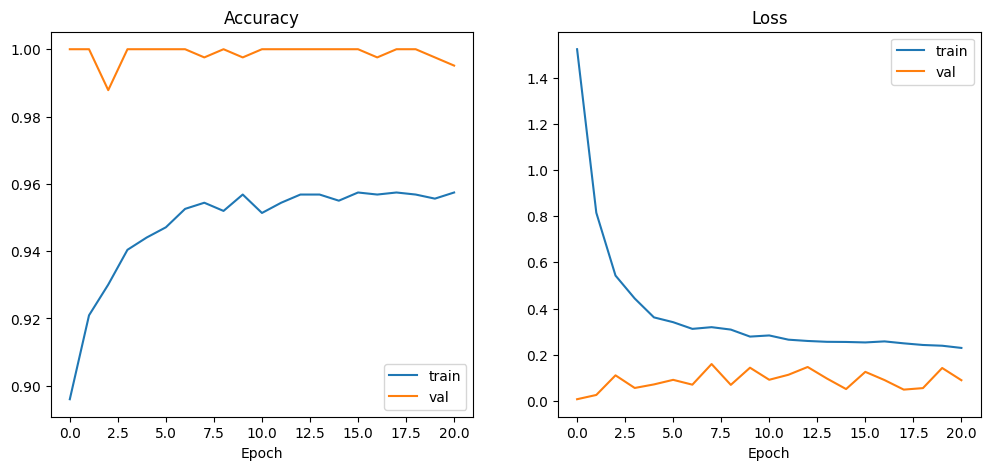

In [15]:
# Step 12: Visualize training

import numpy as np

# Show the best validation accuracy
best_val_acc = np.max(my_history.history['val_accuracy'])
print(f"Best validation accuracy: {best_val_acc:.4f}")

# Show the best validation loss
best_val_loss = np.min(my_history.history['val_loss'])
print(f"Best validation loss: {best_val_loss:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(my_history.history['accuracy'], label='train')
plt.plot(my_history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(my_history.history['loss'], label='train')
plt.plot(my_history.history['val_loss'], label='val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

If your code is correct you should see two side-by-side plots showing `Accuracy` on the left and `Loss` on the right.

## **Assignment Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Copy of Assignment_01.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **---WARNING---WARNING--WARNING---**

Unlike class lessons, you are **only given 1 submission** for assignments. If you failed to carefully follow directions and make a bad mistake you won't have a 2nd chance to correct your errors.

Therefore, you are **STRONGLY ENCOURAGED** to have your completed assignment checked by an Instructor **_before_** you submit your PDF to Canvas. Every semester one (or more) students fail to follow directions and receive an automatic `0` on an assignment--which virtually assures that the student just had their final course grade lower by a letter. Don't be that student!

## **Poly-A Tail**

## **DeepSeek**

![__](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/DeepSeek_logo.svg/1920px-DeepSeek_logo.svg.png)

**DeepSeek** (Chinese: 深度求索; pinyin: Shēndù Qiúsuǒ) is a Chinese artificial intelligence company that develops open-source large language models (LLMs). Based in Hangzhou, Zhejiang, it is owned and funded by Chinese hedge fund High-Flyer, whose co-founder, Liang Wenfeng, established the company in 2023 and serves as its CEO.

The DeepSeek-R1 model provides responses comparable to other contemporary large language models, such as OpenAI's GPT-4o and o1. It is trained at a significantly lower cost—stated at US$6 million compared to $100 million for OpenAI's GPT-4 in 2023—and approximately a tenth of the computing power used for Meta's comparable model, LLaMA 3.1. DeepSeek's AI models were developed amid United States sanctions on China and other countries for chips used to develop artificial intelligence, which were intended to restrict the ability of these countries to develop advanced AI systems. Lesser restrictions were later announced that would affect all but a few countries.

On 10 January 2025, DeepSeek released its first free chatbot app, based on the DeepSeek-R1 model, for iOS and Android; by 27 January, DeepSeek had surpassed ChatGPT as the most-downloaded free app on the iOS App Store in the United States,[10] causing Nvidia's share price to drop by 18%. DeepSeek's success against larger and more established rivals has been described as "upending AI"[10] and ushering in "a new era of AI brinkmanship". DeepSeek's compliance with Chinese government censorship policies and its data collection practices have also raised concerns over privacy and information control in the model, prompting regulatory scrutiny in multiple countries.

DeepSeek makes its generative artificial intelligence algorithms, models, and training details open-source, allowing its code to be freely available for use, modification, viewing, and designing documents for building purposes.However, reports indicate that the API version hosted in China applies content restrictions in accordance with local regulations, limiting responses on topics such as the Tiananmen Square massacre and Taiwan’s status. The company reportedly vigorously recruits young AI researchers from top Chinese universities, and hires from outside the computer science field to diversify its models' knowledge and abilities.

**Background**

In February 2016, High-Flyer was co-founded by AI enthusiast Liang Wenfeng, who had been trading since the 2007–2008 financial crisis while attending Zhejiang University. They began stock-trading with a deep learning model running on GPU on October 21, 2016. Prior to this, they used CPU-based models, mainly linear models. Most trading was done by AI by the end of 2017.

By 2019, he established High-Flyer as a hedge fund focused on developing and using AI trading algorithms. By 2021, High-Flyer exclusively used AI in trading, often using Nvidia chips. DeepSeek has made its generative artificial intelligence chatbot open source, meaning its code is freely available for use, modification, and viewing. This includes permission to access and use the source code, as well as design documents, for building purposes.

In 2021, while running High-Flyer, Liang began stockpiling Nvidia GPUs for an AI project.[20] According to 36Kr, Liang had built up a store of 10,000 Nvidia A100 GPUs, which are used to train AI, before the United States federal government imposed AI chip restrictions on China.

On 14 April 2023,[22] High-Flyer announced the start of an artificial general intelligence lab dedicated to research developing AI tools separate from High-Flyer's financial business. Incorporated on 17 July 2023, with High-Flyer as the investor and backer, the lab became its own company, DeepSeek. Venture capital firms were reluctant to provide funding, as they considered it unlikely that the venture would be able to generate an "exit" in a short period of time.

On May 16, 2023, the company Beijing DeepSeek Artificial Intelligence Basic Technology Research Co., Ltd. incorporated under the control of Hangzhou DeepSeek Artificial Intelligence Basic Technology Research Co., Ltd. As of May 2024, Liang Wenfeng held 84% of DeepSeek through two shell corporations.

After releasing DeepSeek-V2 in May 2024, which offered strong performance for a low price, DeepSeek became known as the catalyst for China's AI model price war. It was quickly dubbed the "Pinduoduo of AI", and other major tech giants such as ByteDance, Tencent, Baidu, and Alibaba began to cut the price of their AI models to compete with the company. Despite the low price charged by DeepSeek, it was profitable compared to its rivals that were losing money.

DeepSeek is focused on research and has no detailed plans for commercialization, which also allows its technology to avoid the most stringent provisions of China's AI regulations, such as requiring consumer-facing technology to comply with the government's controls on information.

DeepSeek's hiring preferences target technical abilities rather than work experience, resulting in most new hires being either recent university graduates or developers whose AI careers are less established. Likewise, the company recruits individuals without any computer science background to help its technology understand other topics and knowledge areas, including being able to generate poetry and perform well on the notoriously difficult Chinese college admissions exams (Gaokao).

**Training framework**

High-Flyer/DeepSeek has built at least two computing clusters, Fire-Flyer (萤火一号) and Fire-Flyer 2 (萤火二号). Fire-Flyer began construction in 2019 and finished in 2020, at a cost of 200 million yuan. It contained 1,100 GPUs interconnected at a rate of 200 Gbps. It was 'retired' after 1.5 years in operation. Fire-Flyer 2 began construction in 2021 with a budget of 1 billion yuan.[18] It was reported that in 2022, Fire-Flyer 2's capacity had been utilized at over 96%, totaling 56.74 million GPU hours. Of those GPU hours, 27% was used to support scientific computing outside the company.

Fire-Flyer 2 consisted of co-designed software and hardware architecture. On the hardware side, there are more GPUs with 200 Gbps interconnects. The cluster is divided into two "zones", and the platform supports cross-zone tasks. The network topology was two fat trees, chosen for its high bisection bandwidth. On the software side, there are

* **3FS (Fire-Flyer File System):** A distributed parallel file system. It was specifically designed for asynchronous random reads from a dataset, and uses Direct I/O and RDMA Read. In contrast to standard Buffered I/O, Direct I/O does not cache data. Caching is useless for this case, since each data read is random, and would not be reused.
* **hfreduce:** Library for asynchronous communication, originally designed to replace Nvidia Collective Communication Library (NCCL).[30] It was mainly used for allreduce, especially of gradients during backpropagation. It is asynchronously run on the CPU to avoid blocking kernels on the GPU.[28] It uses two-tree broadcast like NCCL.
* **hfai.nn:** Software library of commonly used operators in neural network training, similar to torch.nn in PyTorch.
* **HaiScale Distributed Data Parallel (DDP):** Parallel training library that implements various forms of parallelism in deep learning such as Data Parallelism (DP), Pipeline Parallelism (PP), Tensor Parallelism (TP), Experts Parallelism (EP), Fully Sharded Data Parallel (FSDP) and Zero Redundancy Optimizer (ZeRO). It is similar to PyTorch DDP, which uses NCCL on the backend.
* **HAI Platform:** Various applications such as task scheduling, fault handling, and disaster recovery.
During 2022, Fire-Flyer 2 had 5000 PCIe A100 GPUs in 625 nodes, each containing 8 GPUs. At the time, they chose to exclusively use PCIe instead of DGX version of A100, since at the time the models they trained could fit within a single 40 GB GPU VRAM, so there was no need for the higher bandwidth of DGX (i.e. they required only data parallelism but not model parallelism).[30] Later, they also incorporated NVLinks and NCCL, to train larger models that required model parallelism.